In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from stats_functions import *
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [19]:
index = "^GSPC"
stock = "AAL"
period = "3y"
interval = "1wk"

In [20]:
index_data = get_price_data(index, period=period, interval=interval)
stock_data = get_price_data(stock, period=period, interval=interval)


data = pd.merge(index_data, stock_data, left_index=True, right_index=True)
data[f"{index}_return"] = data[index].pct_change()
data[f"{stock}_return"] = data[stock].pct_change()
data.dropna(inplace=True)
X = data[f"{index}_return"].values
y = data[f"{stock}_return"].values
X = sm.add_constant(X)

## OLS Regression

In [21]:
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     51.87
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           2.46e-11
Time:                        17:36:51   Log-Likelihood:                 232.06
No. Observations:                 156   AIC:                            -460.1
Df Residuals:                     154   BIC:                            -454.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.004     -0.342      0.7

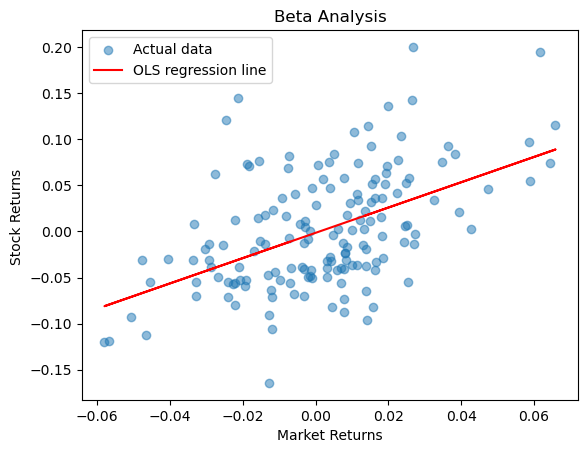

In [22]:
X_plot = X[:, 1]
plt.scatter(X_plot, y, alpha=0.5, label="Actual data")
plt.plot(X_plot, ols.fittedvalues, "r", label="OLS regression line")
plt.xlabel("Market Returns")
plt.ylabel("Stock Returns ")
plt.title("Beta Analysis")
plt.legend()
plt.show()

# QQ Plot to see the distribution of the residuals

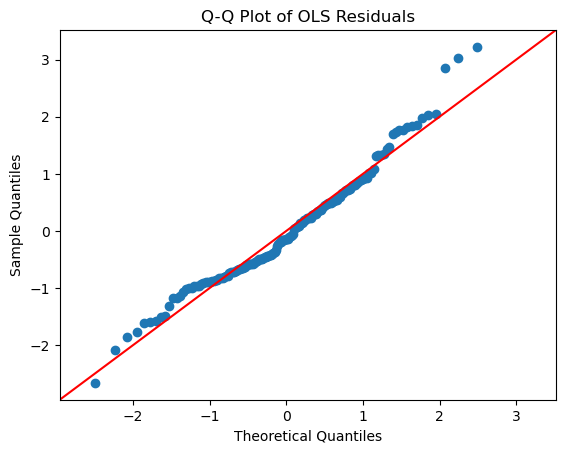

In [23]:
fig = sm.qqplot(ols.resid, line="45", fit=True)
plt.title("Q-Q Plot of OLS Residuals")
plt.show()

## Breusch Pagan Test for heteroskedasticity

In [24]:
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(
    ols.resid, ols.model.exog
)
print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

Lagrange multiplier statistic: 0.02180234650498658
Lagrange multiplier p-value:   0.8826141183935462
F-statistic:                   0.021525837663707942
P-value of F-statistic:        0.8835473990869404


## Refitting with robust standard errors if p_value < .05
notice the differences in the standard error and the confidence interval

In [25]:
ols = sm.OLS(y, X).fit(cov_type="HC1")
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     59.18
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.60e-12
Time:                        17:36:52   Log-Likelihood:                 232.06
No. Observations:                 156   AIC:                            -460.1
Df Residuals:                     154   BIC:                            -454.0
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.004     -0.343      0.7